# 주성분 분석 (PCA : Principal Component Analysis)
- 다차원의 데이터를 소차원의 데이터로 환원시키는 기법

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
fruites = np.load("../Data/fruits.npy")
fruites.shape

(300, 100, 100)

In [3]:
# 3차원 데이터를 2차원 데이터로 변경
fruites_2d = fruites.reshape(-1, 100*100)
fruites_2d.shape

(300, 10000)

# PCA 모델 구성하기

In [4]:
from sklearn.decomposition import PCA

# 뚜렷한 컬럼과 로우만 선택해야한다 
pca = PCA(n_components=50) # 300개의 데이터중 구별이 확실한 주성분 50개 선택 (Feature들 중 특징을 포함하여 구성)
pca.fit(fruites_2d)

PCA(n_components=50)

In [5]:
# 축소된 차원의 크기 확인하기
pca.components_.shape

(50, 10000)

In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 갯수
    # 한 줄에 10개씩 이미지 그리기. 샘플 갯수를 10으로 나누어 전체 행 갯수를 계산
    rows = int(np.ceil(n/10))   # 올림처리
    # 행이 1개이면 열 갯수가 샘플 갯수이고 그렇지 않으면 10개
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n : # n개까지만 그린다.
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

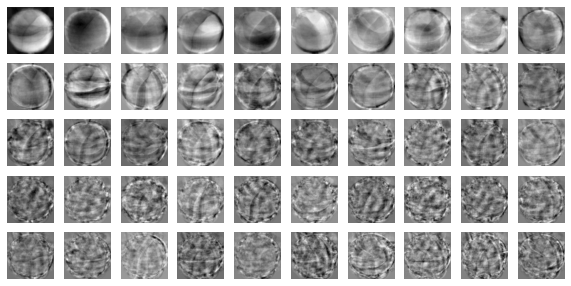

In [7]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [8]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
print(fruites_2d.shape) # 원본크기
fruites_pca = pca.transform(fruites_2d)
print(fruites_pca.shape) # 재배치

(300, 10000)
(300, 50)


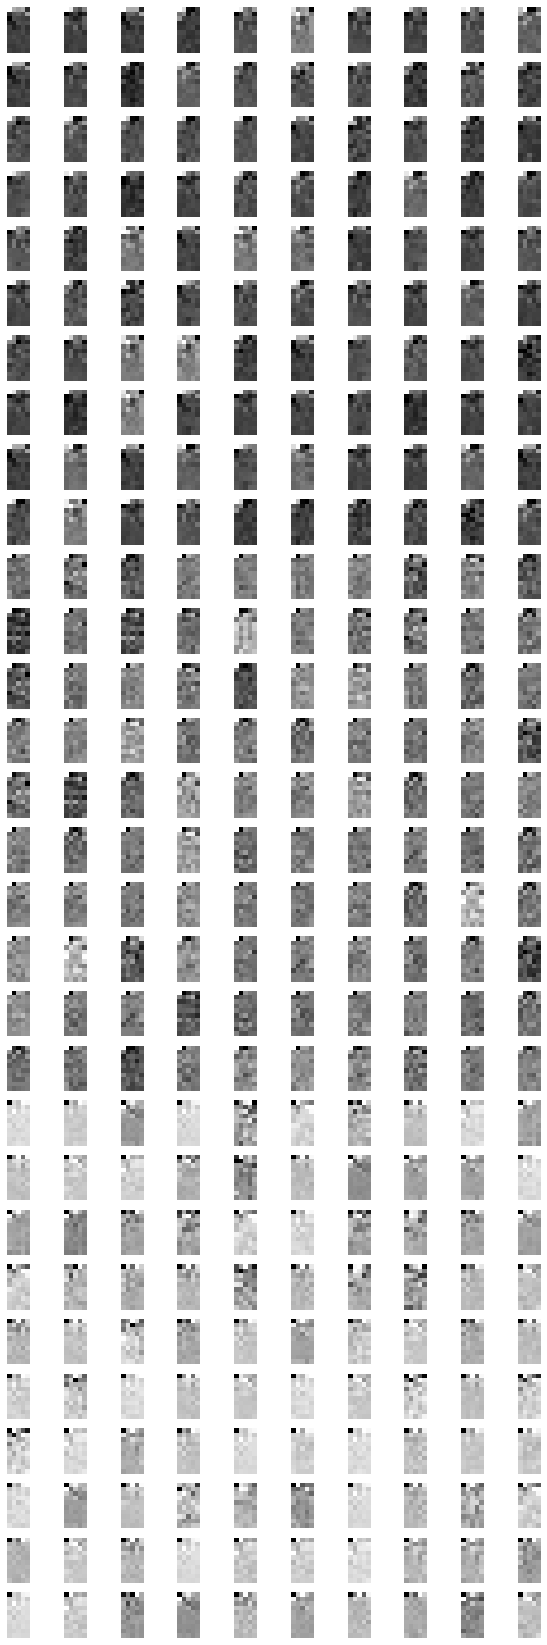

In [9]:
# 이미지가지고 특징들만 뽑아 놓은거 (DL에서는 CNN이라고 한다.)
# encoding
draw_fruits(fruites_pca.reshape(-1, 10, 5)) # 10, 5는 50개만 맞춰면됨

---
# 원본데이터 재구성
- decoding

In [10]:
fruites_inverse = pca.inverse_transform(fruites_pca)
print(fruites_inverse.shape)

(300, 10000)


In [11]:
# 그림을 그리기 위해 2차원 확작
fruites_reconstruct = fruites_inverse.reshape(-1, 100, 100)
fruites_reconstruct.shape

(300, 100, 100)

> 압축했다가 다시 풀었다

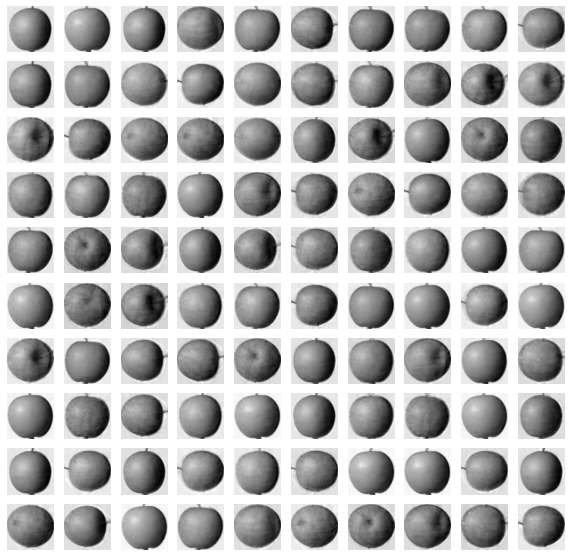

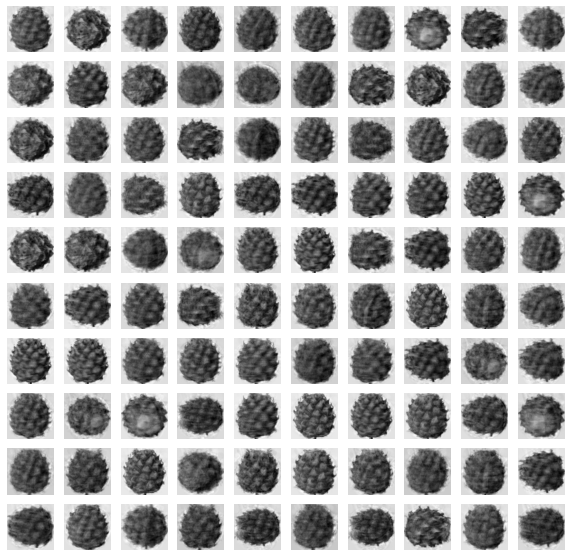

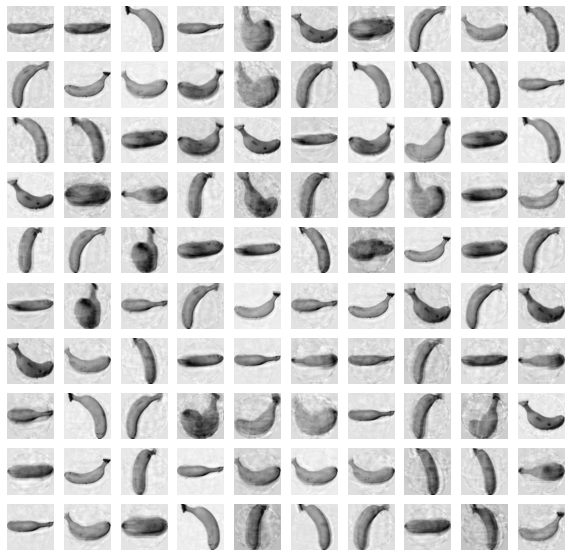

In [12]:
for start in [0, 100, 200]:
    draw_fruits(fruites_reconstruct[start:start+100])
    print("\n")

> 1/200의 데이터 특성만 가지고도 전반적으로 배경은 깨끗하지 않으나 물체의 구분은 가능하다.

---
# 설명된 분산
: 주성분으로 구성할때 원본 데이터의 분산(이미지의 크기)을 어느정도 유지하고 있었는지 확인하는 방법

In [13]:
# 100%에 가까울수록 원본
np.sum(pca.explained_variance_ratio_) # 50개의 주성분 데이터.

0.9222943102525812

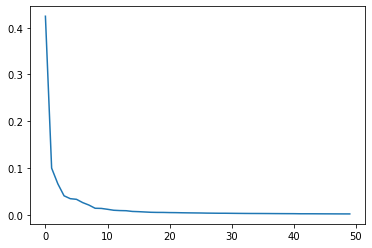

In [14]:
# 그래프 그리기
plt.plot(pca.explained_variance_ratio_)
plt.show()

> 10개 정도만 주성분을 잡아도 0에 가까운걸보니 10개도 문제 없을꺼 같아보인다.

---
# 주성분을 10개만 정의해서 해보자

In [15]:
pca10 = PCA(n_components=10)
pca10.fit(fruites_2d)
pca10.components_.shape

(10, 10000)

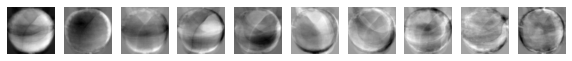

In [16]:
draw_fruits(pca10.components_.reshape(-1, 100, 100))

In [17]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 10개의 주성분으로 변경하기
fruites_pca10 = pca10.transform(fruites_2d)
print(fruites_pca10.shape) # 재배치

(300, 10)


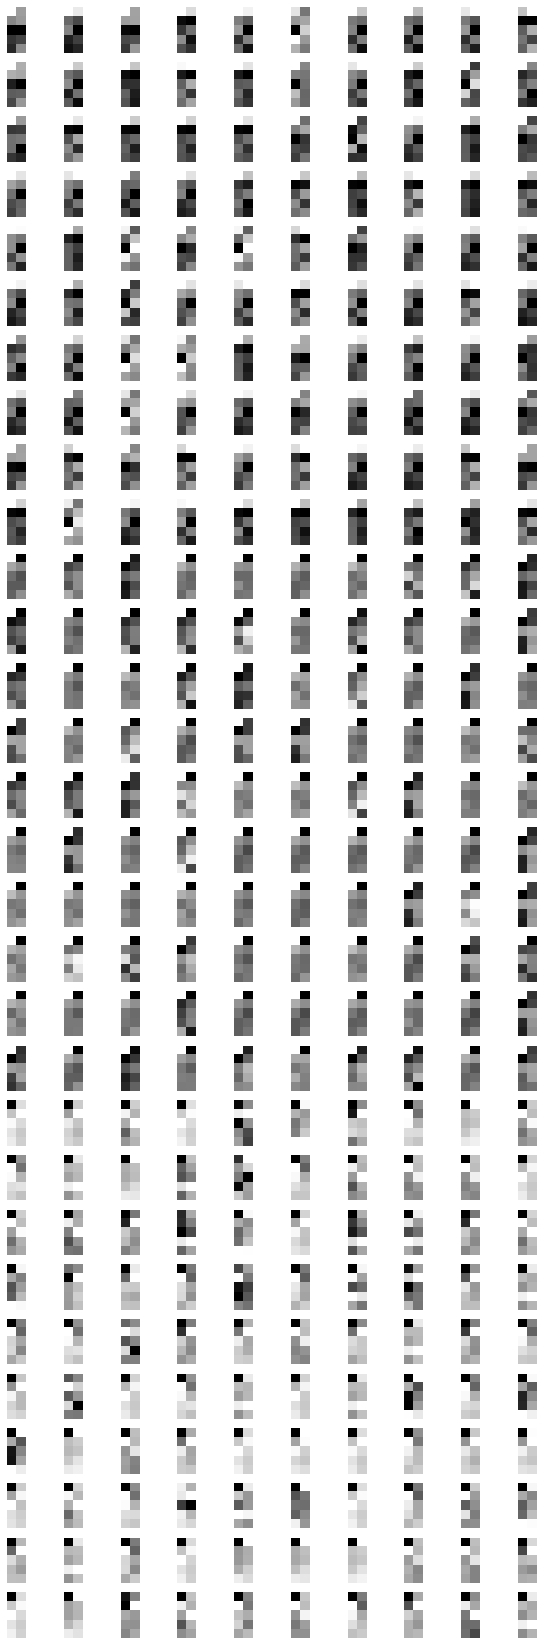

In [18]:
draw_fruits(fruites_pca10.reshape(-1, 5, 2))

In [19]:
fruites_inverse10 = pca10.inverse_transform(fruites_pca10)
print(fruites_inverse10.shape)

(300, 10000)


In [20]:
# 그림을 그리기 위해 2차원 확작
fruites_reconstruct10 = fruites_inverse10.reshape(-1, 100, 100)
fruites_reconstruct10.shape

(300, 100, 100)

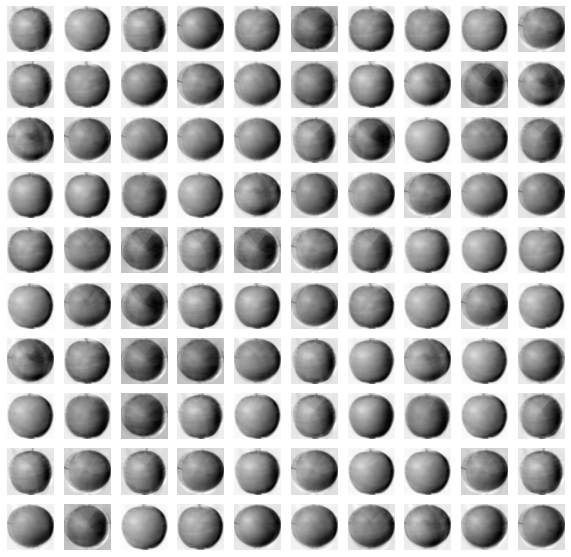

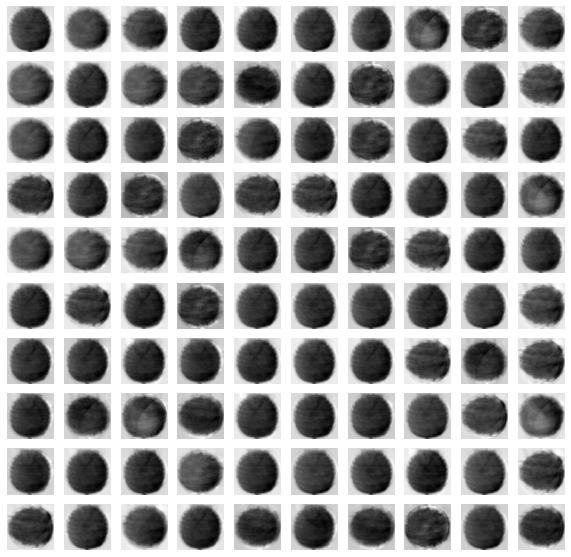

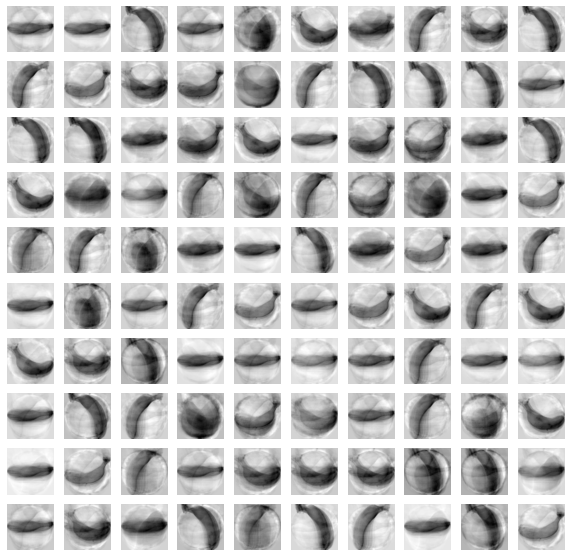

In [21]:
for start in [0, 100, 200]:
    draw_fruits(fruites_reconstruct10[start:start+100])
    print("\n")

In [22]:
# 100%에 가까울수록 원본
np.sum(pca10.explained_variance_ratio_)

0.7711096075874181

---
# 로지스틱 회귀분석에 주성분 분석을 대입하여 사용해보기!
- 실제적으로 자율주행차량에서 쓰임
- 결론적으로 써먹는거까지 하는게 중요한거지

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [24]:
# 로지스틱 회귀분석은 지도학습이므로 Target이 필요함
target = np.array([0]*100 + [1]*100 + [2]*100)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
# 교차검증을 실시
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruites_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.2871843814849854


> 정확도는 99.7% 정도이며, 계산에 필요한 시간은 0.3초 정도 나왔다.

In [26]:
# 300 * 50 으로 구성된 주성분 분석으로 구성된 데이터로 확인
# 교차검증을 실시
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruites_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.021836566925048827


> 정확도는 100% 정도이며 계산에 필요한 시간은 0.04초 이다

In [27]:
# 300 * 10 으로 구성된 주성분 분석으로 구성된 데이터로 확인
# 교차검증을 실시
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruites_pca10, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.01297297477722168


---
# 주성분 분석의 분산의 크기를 정해 사용하기

In [28]:
pca = PCA(n_components=0.5) # n_components를 실수를 정하면 분산의 percentage라고 인식해서 percentage정도로 나타낸다
pca.fit(fruites_2d)

PCA(n_components=0.5)

In [29]:
print(pca.n_components_)

2


> 필요한 주성분 Feature가 2개만 있어도 50%를 맞출수 있대!  
> 주성분 2개변 그래프로 표현이 가능하다.

In [30]:
fruites_pca = pca.transform(fruites_2d)
print(fruites_pca.shape)

(300, 2)


In [31]:
# 교차 검증으로 확인
scores = cross_validate(lr, fruites_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.018574619293212892


> 정확도는 99.3% 이며 계산시간은 0.01이다.

In [32]:
# 주성분의 값을 알아보자
pcaComponents = pca.fit_transform(fruites_2d)
# pcaComponents

# 데이터 프레임으로 구성
import pandas as pd
pcaDf = pd.DataFrame(data=pcaComponents, columns=['PCA1', 'PCA2'])
pcaDf.head()

,PCA1,PCA2
0,-2776.498471,-1580.322486
1,-3075.909684,-2734.476728
2,-2616.828977,-1496.477291
3,-3113.625578,-2527.080543
4,-2519.267133,-2323.854018


---
# k-Means에 주성분 분석 적용해보기

In [33]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruites_pca)

KMeans(n_clusters=3, random_state=42)

In [34]:
# 군집 갯수와 빈도수 확인하기
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

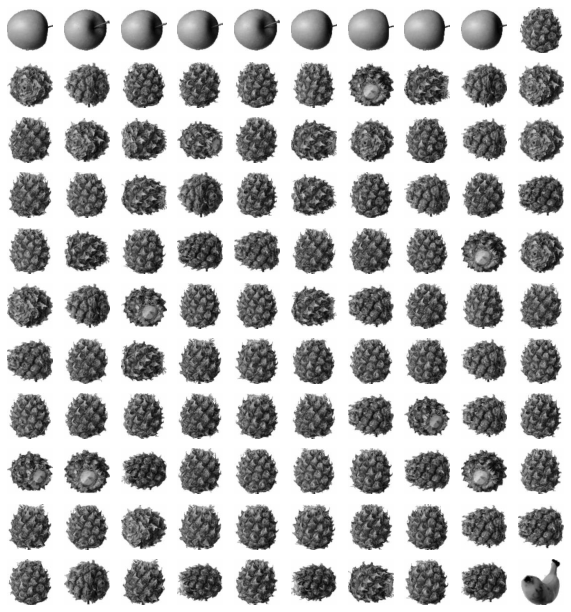

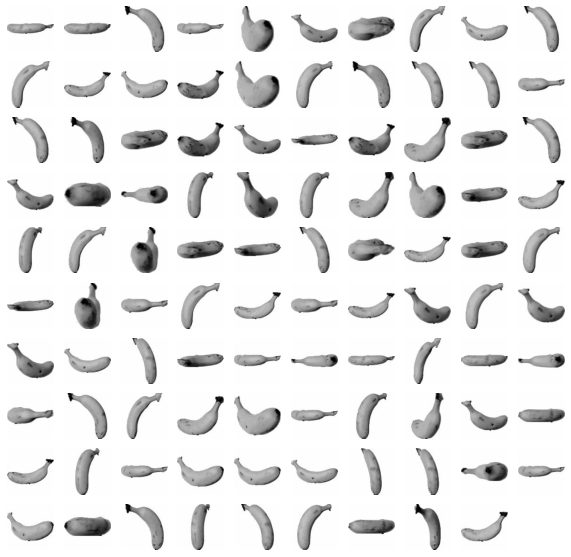

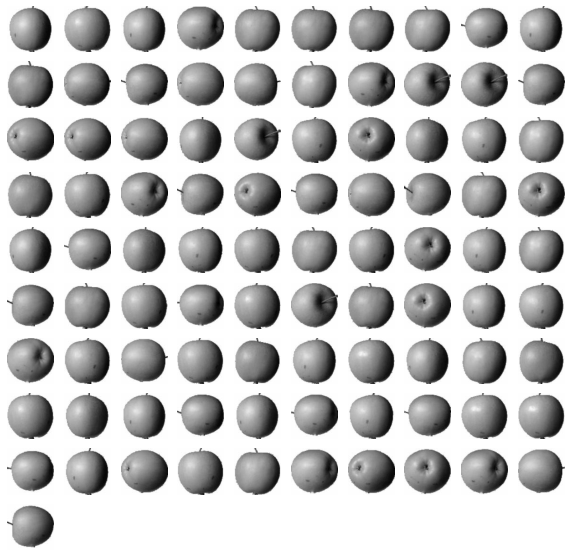

In [35]:
# 그림으로 확인하기
for label in range(0,3):
    draw_fruits(fruites[km.labels_==label])
    print("\n")

---
# 산포도로 확인해보기
- 어떻게 특징점을 잡아서 했길래 2개만 맞춰도 100% 맞추는거야

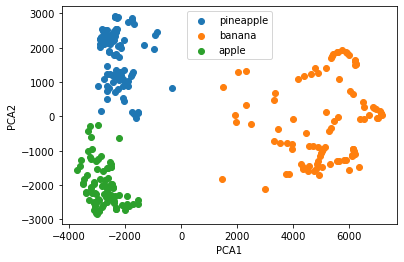

In [38]:
for label in range(0, 3):
    data = fruites_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()